<a href="https://colab.research.google.com/github/RithikaKasula/Movie-Recommendation-System/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import chardet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/netflix_titles.csv.zip'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv(path)

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.columns.to_list()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [ ]:
df.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.shape

(8807, 12)

In [ ]:
print("Count no.of duplicated rows is:",df.duplicated().sum())

Count no.of duplicated rows is: 0


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

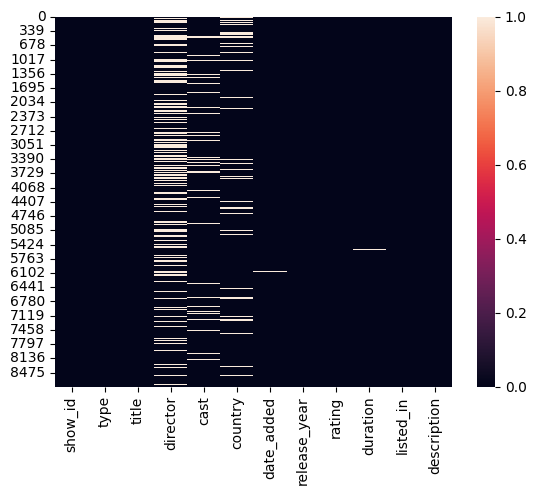

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df['director']

0       Kirsten Johnson
1                   NaN
2       Julien Leclercq
3                   NaN
4                   NaN
             ...       
8802      David Fincher
8803                NaN
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [ ]:
df['cast']

0                                                     NaN
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                     NaN
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                                  NaN
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [ ]:
df['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [ ]:
nan_row=df[df['date_added'].isna()].index.tolist()
nan_row

[6066, 6174, 6795, 6806, 6901, 7196, 7254, 7406, 7847, 8182]

In [ ]:
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
dates=['October 2, 2013','April 14, 2013','September 23, 2003','September 25, 2003','January 7, 2008','March 31, 2010','September 16, 2012','July 13, 2016','April 1, 2015','August 31, 2015']

In [ ]:
len(dates)

10

In [ ]:
nan_indices = df[df['date_added'].isna()].index

In [ ]:
df.loc[nan_indices, 'date_added'] =dates

In [ ]:
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [ ]:
df.replace({'type':{'Movie':0,'TV Show':1}}, inplace=True)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,1,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,1,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df['country']=df['country'].replace(np.nan,'Unknown')

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added         0
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.dropna(subset=['rating','duration'], inplace=True)

In [ ]:
df['director']=df['director'].replace(np.nan,'Unknown')
df['cast']=df['cast'].replace(np.nan,'Unknown')

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df['date_added']=df['date_added'].apply(pd.to_datetime)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,1,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,1,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,1,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df['year']=df['date_added'].dt.year

In [ ]:
df['month']=df['date_added'].dt.month_name()

In [ ]:
df[['month','year']]

,month,year
0,September,2021
1,September,2021
2,September,2021
3,September,2021
4,September,2021
...,...,...
8802,November,2019
8803,July,2019
8804,November,2019
8805,January,2020


In [ ]:
df['month'].value_counts()

month
July         828
December     812
September    772
April        765
October      761
August       755
March        742
January      738
June         728
November     705
May          632
February     562
Name: count, dtype: int64

In [ ]:
df['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8800, dtype: object

In [ ]:
df['release_year'].astype(int)

0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2007
8803    2018
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 8800, dtype: int64

In [ ]:
df['year'].value_counts()

year
2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     427
2015      84
2014      24
2013      13
2011      13
2012       4
2008       3
2009       2
2003       2
2010       2
Name: count, dtype: int64

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
df['description'] = df['description'].fillna('')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocess_text(text):
    """Preprocess text by tokenizing, removing stopwords, and lemmatizing."""
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)


    tokens = [word.lower() for word in tokens if word.isalpha()]


    tokens = [word for word in tokens if word not in stop_words]


    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

df['listed_in_processed'] = df['listed_in'].apply(preprocess_text)
df['description_processed'] = df['description'].apply(preprocess_text)

df['content'] = df['title'] + ' ' + df['listed_in_processed'] + ' ' + df['description_processed']


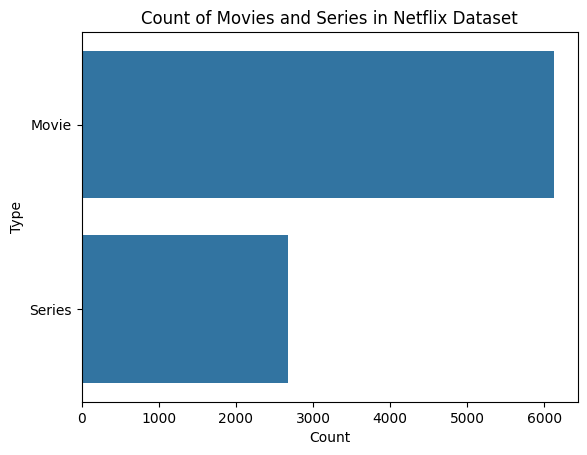

In [ ]:
sns.countplot(data=df, y='type', orient='h')

plt.yticks(ticks=[0, 1], labels=['Movie', 'Series'])

plt.xlabel('Count')
plt.ylabel('Type')
plt.title('Count of Movies and Series in Netflix Dataset')

plt.show()

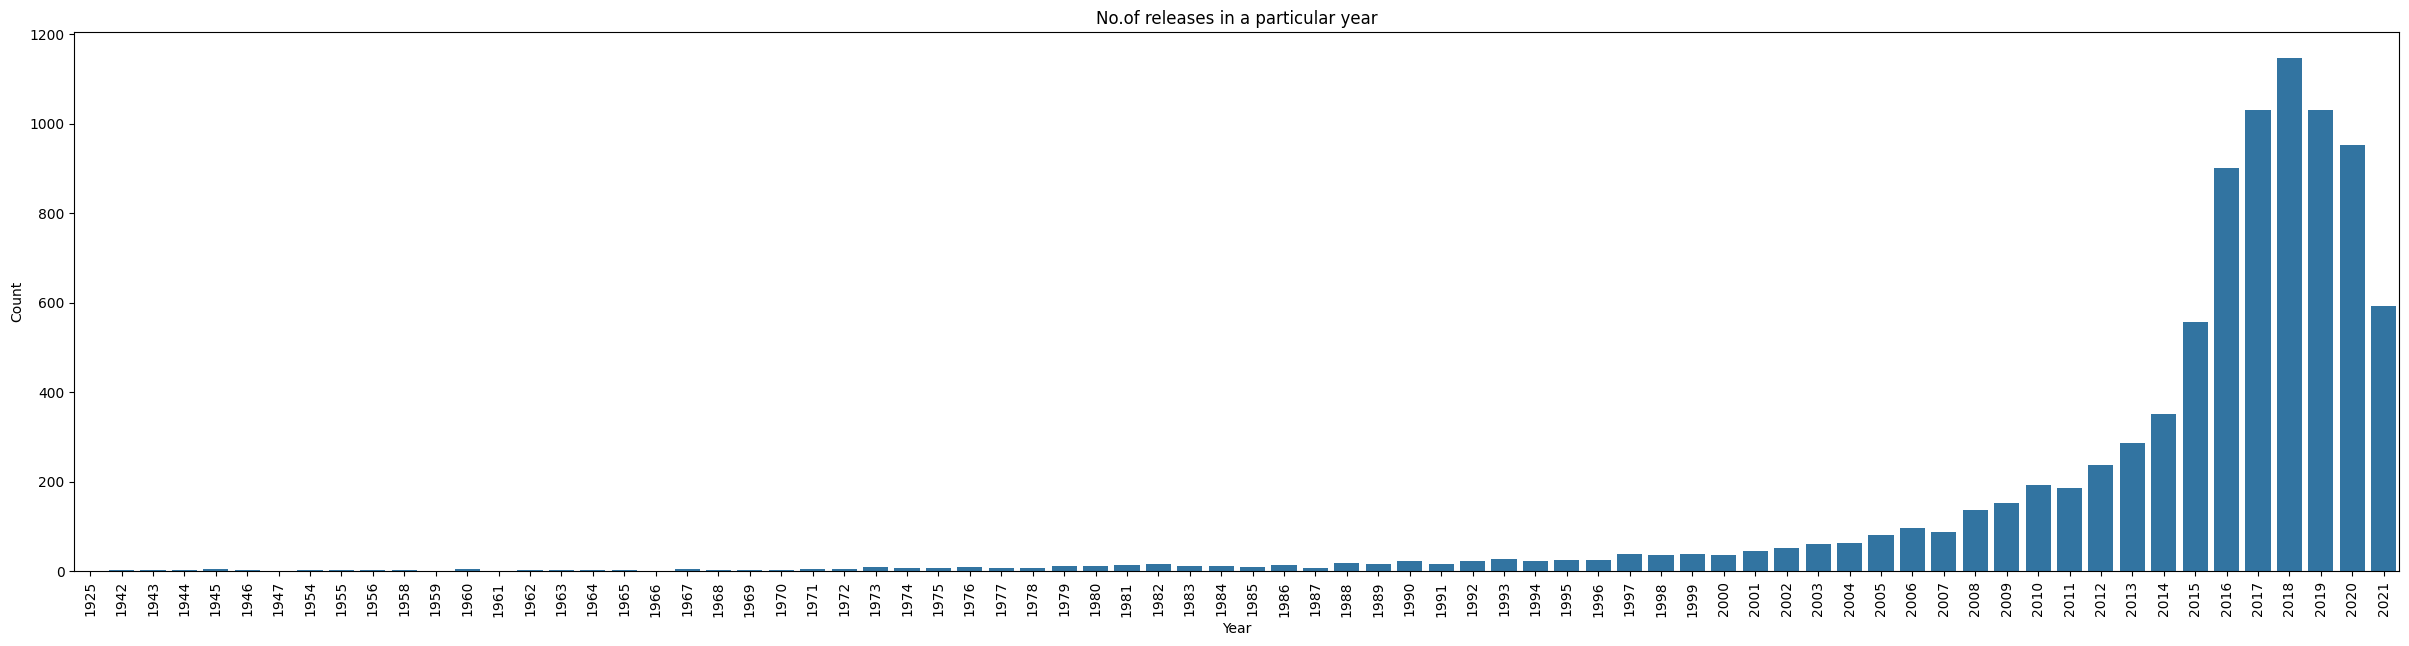

In [ ]:
plt.figure(figsize=(30,7))
sns.countplot(data=df, x='release_year', orient='h')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('No.of releases in a particular year')
plt.show()

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,listed_in_processed,description_processed,content
0,s1,0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,documentary,father nears end life filmmaker kirsten johnso...,Dick Johnson Is Dead documentary father nears ...
1,s2,1,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,international tv show tv drama tv mystery,crossing path party cape town teen set prove w...,Blood & Water international tv show tv drama t...
2,s3,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,crime tv show international tv show tv action ...,protect family powerful drug lord skilled thie...,Ganglands crime tv show international tv show ...
3,s4,1,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,docuseries reality tv,feud flirtation toilet talk go among incarcera...,Jailbirds New Orleans docuseries reality tv fe...
4,s5,1,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,international tv show romantic tv show tv comedy,city coaching center known train india finest ...,Kota Factory international tv show romantic tv...


In [ ]:
list(df)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description',
 'year',
 'month',
 'listed_in_processed',
 'description_processed',
 'content']

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')


df['description'] = df['description'].fillna('')
df['content'] = df['title'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['listed_in'] + ' ' + df['description']

stop_words = stopwords.words('english')
tfidf = TfidfVectorizer(stop_words=stop_words)

tfidf_matrix = tfidf.fit_transform(df['content'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


indices = pd.Series(df.index, index=df['title']).drop_duplicates()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def get_recommendations(title, content_type, release_year, cast, country, cosine_sim=cosine_sim):
    """Function to get movie recommendations based on multiple filters."""
    if title not in indices:
        return []

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]


    filtered_df = df.iloc[movie_indices]

    if content_type != '':
        content_type = 'Movie' if content_type == '0' else 'TV Show'
        filtered_df = filtered_df[filtered_df['type'] == content_type]

    if release_year != '':
        filtered_df = filtered_df[filtered_df['release_year'] == int(release_year)]

    if cast != '':
        filtered_df = filtered_df[filtered_df['cast'].str.contains(cast, case=False, na=False)]

    if country != '':
        filtered_df = filtered_df[filtered_df['country'].str.contains(country, case=False, na=False)]

    recommendations = filtered_df['title'].tolist()


    if not recommendations:
        recommendations = [df['title'].iloc[movie_indices[0]]]
        recommendations += df['title'].iloc[movie_indices[1:3]].tolist()

    return recommendations


In [ ]:
def chatbot():
    print("𝗛𝗲𝗹𝗹𝗼! 𝗜'𝗺 𝘆𝗼𝘂𝗿 𝗺𝗼𝘃𝗶𝗲 𝗿𝗲𝗰𝗼𝗺𝗺𝗲𝗻𝗱𝗮𝘁𝗶𝗼𝗻 𝗰𝗵𝗮𝘁𝗯𝗼𝘁.")
    print("𝗬𝗼𝘂 𝗰𝗮𝗻 𝗮𝘀𝗸 𝗺𝗲 𝘁𝗼 𝗿𝗲𝗰𝗼𝗺𝗺𝗲𝗻𝗱 𝗺𝗼𝘃𝗶𝗲𝘀 𝗯𝗮𝘀𝗲𝗱 𝗼𝗻 𝗮 𝘁𝗶𝘁𝗹𝗲 𝘆𝗼𝘂 𝗹𝗶𝗸𝗲 𝗮𝗻𝗱 𝗮𝗱𝗱𝗶𝘁𝗶𝗼𝗻𝗮𝗹 𝗰𝗿𝗶𝘁𝗲𝗿𝗶𝗮.")
    print("𝗧𝘆𝗽𝗲 '𝗲𝘅𝗶𝘁' 𝗮𝘁 𝗮𝗻𝘆 𝗽𝗿𝗼𝗺𝗽𝘁 𝘁𝗼 𝗲𝗻𝗱 𝘁𝗵𝗲 𝗰𝗼𝗻𝘃𝗲𝗿𝘀𝗮𝘁𝗶𝗼𝗻.")

    while True:
        user_input = input("𝗘𝗻𝘁𝗲𝗿 𝗮 𝗺𝗼𝘃𝗶𝗲 𝘁𝗶𝘁𝗹𝗲: ").strip()
        if user_input.lower() == 'exit':
            print("𝗚𝗼𝗼𝗱𝗯𝘆𝗲!")
            break

        content_type = input("𝗘𝗻𝘁𝗲𝗿 𝘁𝘆𝗽𝗲 (𝟬 𝗳𝗼𝗿 𝗠𝗼𝘃𝗶𝗲, 𝟭 𝗳𝗼𝗿 𝗦𝗲𝗿𝗶𝗲𝘀, 𝗹𝗲𝗮𝘃𝗲 𝗯𝗹𝗮𝗻𝗸 𝗳𝗼𝗿 𝗮𝗻𝘆): ").strip()
        if content_type.lower() == 'exit':
            print("𝗚𝗼𝗼𝗱𝗯𝘆𝗲!")
            break

        release_year = input("𝗘𝗻𝘁𝗲𝗿 𝗿𝗲𝗹𝗲𝗮𝘀𝗲 𝘆𝗲𝗮𝗿 (𝗹𝗲𝗮𝘃𝗲 𝗯𝗹𝗮𝗻𝗸 𝗳𝗼𝗿 𝗮𝗻𝘆): ").strip()
        if release_year.lower() == 'exit':
            print("𝗚𝗼𝗼𝗱𝗯𝘆𝗲!")
            break

        cast = input("𝗘𝗻𝘁𝗲𝗿 𝗰𝗮𝘀𝘁 𝗺𝗲𝗺𝗯𝗲𝗿 (𝗹𝗲𝗮𝘃𝗲 𝗯𝗹𝗮𝗻𝗸 𝗳𝗼𝗿 𝗮𝗻𝘆): ").strip()
        if cast.lower() == 'exit':
            print("𝗚𝗼𝗼𝗱𝗯𝘆𝗲!")
            break

        country = input("𝗘𝗻𝘁𝗲𝗿 𝗰𝗼𝘂𝗻𝘁𝗿𝘆 (𝗹𝗲𝗮𝘃𝗲 𝗯𝗹𝗮𝗻𝗸 𝗳𝗼𝗿 𝗮𝗻𝘆):").strip()
        if country.lower() == 'exit':
            print("𝗚𝗼𝗼𝗱𝗯𝘆𝗲!")
            break

        recommendations = get_recommendations(user_input, content_type, release_year, cast, country)

        if recommendations:
            print(f"𝗜𝗳 𝘆𝗼𝘂 𝗹𝗶𝗸𝗲𝗱'{user_input}', 𝘆𝗼𝘂 𝗺𝗶𝗴𝗵𝘁 𝗮𝗹𝘀𝗼 𝗹𝗶𝗸𝗲:")
        else:
            print("𝗦𝗼𝗿𝗿𝘆, 𝗜 𝗰𝗼𝘂𝗹𝗱𝗻'𝘁 𝗳𝗶𝗻𝗱 𝗮𝗻𝘆 𝗺𝗼𝘃𝗶𝗲𝘀 𝗺𝗮𝘁𝗰𝗵𝗶𝗻𝗴 𝘆𝗼𝘂𝗿 𝗰𝗿𝗶𝘁𝗲𝗿𝗶𝗮. 𝗛𝗲𝗿𝗲 𝗮𝗿𝗲 𝘀𝗼𝗺𝗲 𝗰𝗹𝗼𝘀𝗲𝗹𝘆 𝗿𝗲𝗹𝗮𝘁𝗲𝗱 𝗺𝗼𝘃𝗶𝗲𝘀/𝘀𝗲𝗿𝗶𝗲𝘀 𝗯𝗮𝘀𝗲𝗱 𝗼𝗻 𝘁𝗵𝗲 𝘁𝗶𝘁𝗹𝗲:")

        for idx, title in enumerate(recommendations, 1):
            print(f"{idx}. {title}")

if __name__ == "__main__":
    chatbot()


𝗛𝗲𝗹𝗹𝗼! 𝗜'𝗺 𝘆𝗼𝘂𝗿 𝗺𝗼𝘃𝗶𝗲 𝗿𝗲𝗰𝗼𝗺𝗺𝗲𝗻𝗱𝗮𝘁𝗶𝗼𝗻 𝗰𝗵𝗮𝘁𝗯𝗼𝘁.
𝗬𝗼𝘂 𝗰𝗮𝗻 𝗮𝘀𝗸 𝗺𝗲 𝘁𝗼 𝗿𝗲𝗰𝗼𝗺𝗺𝗲𝗻𝗱 𝗺𝗼𝘃𝗶𝗲𝘀 𝗯𝗮𝘀𝗲𝗱 𝗼𝗻 𝗮 𝘁𝗶𝘁𝗹𝗲 𝘆𝗼𝘂 𝗹𝗶𝗸𝗲 𝗮𝗻𝗱 𝗮𝗱𝗱𝗶𝘁𝗶𝗼𝗻𝗮𝗹 𝗰𝗿𝗶𝘁𝗲𝗿𝗶𝗮.
𝗧𝘆𝗽𝗲 '𝗲𝘅𝗶𝘁' 𝗮𝘁 𝗮𝗻𝘆 𝗽𝗿𝗼𝗺𝗽𝘁 𝘁𝗼 𝗲𝗻𝗱 𝘁𝗵𝗲 𝗰𝗼𝗻𝘃𝗲𝗿𝘀𝗮𝘁𝗶𝗼𝗻.
𝗘𝗻𝘁𝗲𝗿 𝗮 𝗺𝗼𝘃𝗶𝗲 𝘁𝗶𝘁𝗹𝗲: The Vampire Diaries
𝗘𝗻𝘁𝗲𝗿 𝘁𝘆𝗽𝗲 (𝟬 𝗳𝗼𝗿 𝗠𝗼𝘃𝗶𝗲, 𝟭 𝗳𝗼𝗿 𝗦𝗲𝗿𝗶𝗲𝘀, 𝗹𝗲𝗮𝘃𝗲 𝗯𝗹𝗮𝗻𝗸 𝗳𝗼𝗿 𝗮𝗻𝘆): 1
𝗘𝗻𝘁𝗲𝗿 𝗿𝗲𝗹𝗲𝗮𝘀𝗲 𝘆𝗲𝗮𝗿 (𝗹𝗲𝗮𝘃𝗲 𝗯𝗹𝗮𝗻𝗸 𝗳𝗼𝗿 𝗮𝗻𝘆): 2011
𝗘𝗻𝘁𝗲𝗿 𝗰𝗮𝘀𝘁 𝗺𝗲𝗺𝗯𝗲𝗿 (𝗹𝗲𝗮𝘃𝗲 𝗯𝗹𝗮𝗻𝗸 𝗳𝗼𝗿 𝗮𝗻𝘆): 
𝗘𝗻𝘁𝗲𝗿 𝗰𝗼𝘂𝗻𝘁𝗿𝘆 (𝗹𝗲𝗮𝘃𝗲 𝗯𝗹𝗮𝗻𝗸 𝗳𝗼𝗿 𝗮𝗻𝘆):America
𝗜𝗳 𝘆𝗼𝘂 𝗹𝗶𝗸𝗲𝗱'The Vampire Diaries', 𝘆𝗼𝘂 𝗺𝗶𝗴𝗵𝘁 𝗮𝗹𝘀𝗼 𝗹𝗶𝗸𝗲:
1. The Originals
2. My Babysitter's a Vampire
3. The Little Vampire
𝗘𝗻𝘁𝗲𝗿 𝗮 𝗺𝗼𝘃𝗶𝗲 𝘁𝗶𝘁𝗹𝗲: Stranger Things
𝗘𝗻𝘁𝗲𝗿 𝘁𝘆𝗽𝗲 (𝟬 𝗳𝗼𝗿 𝗠𝗼𝘃𝗶𝗲, 𝟭 𝗳𝗼𝗿 𝗦𝗲𝗿𝗶𝗲𝘀, 𝗹𝗲𝗮𝘃𝗲 𝗯𝗹𝗮𝗻𝗸 𝗳𝗼𝗿 𝗮𝗻𝘆): 1
𝗘𝗻𝘁𝗲𝗿 𝗿𝗲𝗹𝗲𝗮𝘀𝗲 𝘆𝗲𝗮𝗿 (𝗹𝗲𝗮𝘃𝗲 𝗯𝗹𝗮𝗻𝗸 𝗳𝗼𝗿 𝗮𝗻𝘆): 
𝗘𝗻𝘁𝗲𝗿 𝗰𝗮𝘀𝘁 𝗺𝗲𝗺𝗯𝗲𝗿 (𝗹𝗲𝗮𝘃𝗲 𝗯𝗹𝗮𝗻𝗸 𝗳𝗼𝗿 𝗮𝗻𝘆): 
𝗘𝗻𝘁𝗲𝗿 𝗰𝗼𝘂𝗻𝘁𝗿𝘆 (𝗹𝗲𝗮𝘃𝗲 𝗯𝗹𝗮𝗻𝗸 𝗳𝗼𝗿 𝗮𝗻𝘆):
𝗜𝗳 𝘆𝗼𝘂 𝗹𝗶𝗸𝗲𝗱'Stranger Things', 𝘆𝗼𝘂 𝗺𝗶𝗴𝗵𝘁 𝗮𝗹𝘀𝗼 𝗹𝗶𝗸𝗲:
1. Beyond Stranger Things
2. Prank Encounters
3. The Umbrella Academy
𝗘𝗻𝘁𝗲𝗿 𝗮 𝗺𝗼𝘃𝗶𝗲 𝘁𝗶𝘁𝗹𝗲: Ganglands
𝗘𝗻𝘁𝗲𝗿 𝘁𝘆𝗽𝗲 (𝟬 𝗳𝗼𝗿 𝗠𝗼𝘃𝗶𝗲, 𝟭 𝗳𝗼𝗿 𝗦𝗲𝗿𝗶𝗲𝘀, 𝗹𝗲𝗮𝘃𝗲 𝗯𝗹𝗮𝗻𝗸 𝗳𝗼𝗿 𝗮𝗻𝘆): 0
𝗘𝗻𝘁𝗲𝗿 𝗿𝗲𝗹𝗲𝗮𝘀𝗲 𝘆𝗲𝗮𝗿